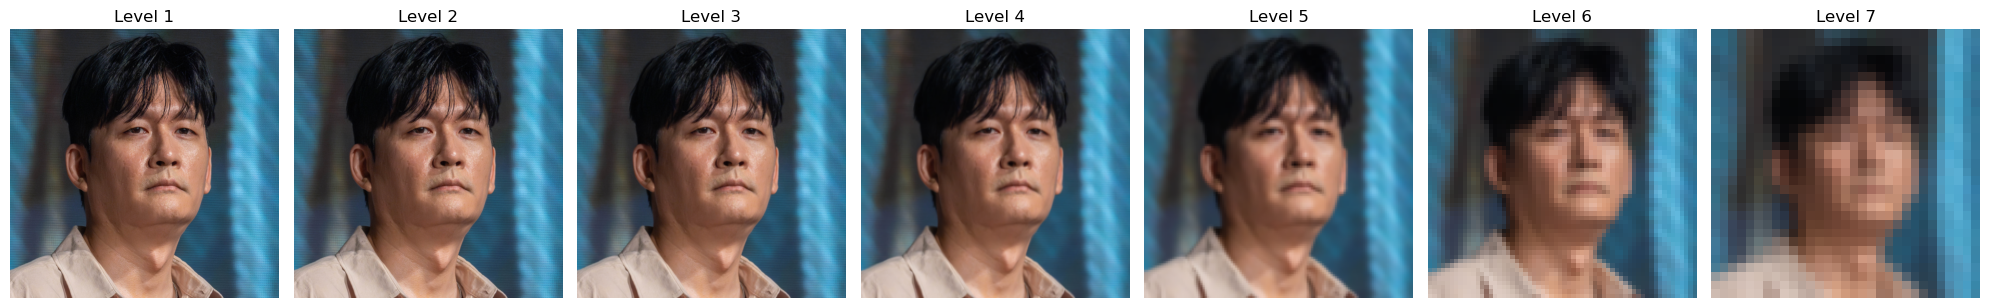

In [3]:
import matplotlib.pyplot as plt
import cv2

image = cv2.imread('images/_X1A1090-sq_compress.jpg', cv2.IMREAD_COLOR)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

def gaussian_pyramid(img, levels):
    pyramid = [img]
    for i in range(levels - 1):
        img = cv2.pyrDown(img)
        pyramid.append(img)
    return pyramid

lv = 7
pyra = gaussian_pyramid(image_rgb, lv)

fix, axes = plt.subplots(1, lv, figsize=(20, 8))

for i, ax in enumerate(axes):
    ax.imshow(pyra[i])
    ax.axis('off')
    ax.set_title(f'Level {i+1}')

plt.tight_layout()
plt.show()

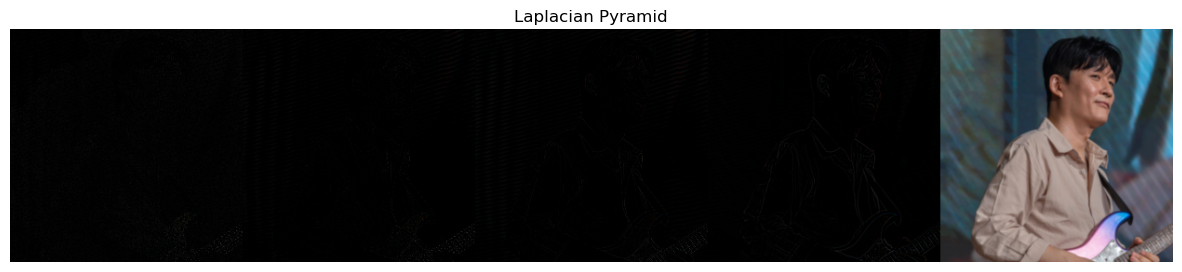

In [6]:
import matplotlib.pyplot as plt
import cv2

image = cv2.imread('images/_X1A0499-square.jpg', cv2.IMREAD_COLOR)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

def gaussian_pyramid(img, levels):
    pyramid = [img]
    for i in range(levels - 1):
        img = cv2.pyrDown(img)
        pyramid.append(img)
    return pyramid

def laplacian_pyramid(g_pyramid):
    laplacian = []
    for i in range(len(g_pyramid) - 1):
        next_level = cv2.pyrUp(g_pyramid[i + 1])

        if next_level.shape[0] > g_pyramid[i].shape[0]:
            next_level = next_level[:-1, :, :]

        if next_level.shape[1] > g_pyramid[i].shape[1]:
            next_level = next_level[:-1, :, :]

        lap = cv2.subtract(g_pyramid[i], next_level)
        laplacian.append(lap)

    laplacian.append(g_pyramid[-1])    
    return laplacian

levels = 5
g_pyramid = gaussian_pyramid(image_rgb, levels)
l_pyramid = laplacian_pyramid(g_pyramid)

min_height = min([img.shape[0] for img in l_pyramid])
concatenated_laplace_horizontal = cv2.resize(l_pyramid[0], (int(l_pyramid[0].shape[1] * min_height / l_pyramid[0].shape[0]), min_height))

fig, ax = plt.subplots(figsize=(15, 6))

for idx, img  in enumerate(l_pyramid[1:], start=1):
    resized_img = cv2.resize(img, (int(img.shape[1] * min_height / img.shape[0]), min_height))
    concatenated_laplace_horizontal = cv2.hconcat([concatenated_laplace_horizontal, resized_img])

ax.imshow(concatenated_laplace_horizontal, cmap='gray')
ax.axis('off')

plt.title('Laplacian Pyramid')
plt.show()